In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway


data = pd.read_excel(r"C:\Users\然\Desktop\MTG version cognitive.xlsx")

In [18]:
# 删除 Cognitive Status 列中的缺失值
data_cleaned = data.dropna(subset=['Cognitive Status'])

# 检查 data_cleaned 是否为空
if data_cleaned.empty:
    raise ValueError("data_cleaned 是空的，请检查 Cognitive Status 列中的缺失值。")

# 创建 Group 列
data_cleaned['Group'] = data_cleaned['Cognitive Status'].map(lambda x: 'Dementia' if x == 'Dementia' else 'No Dementia')

# 检查 Group 列是否创建成功
if 'Group' not in data_cleaned.columns:
    raise ValueError("Group 列未正确创建，请检查 Cognitive Status 列中的值。")

# 获取从第69列开始的列名
cell_columns = data_cleaned.columns[69:]

# 选择数值类型的列
numeric_columns = data_cleaned[cell_columns].select_dtypes(include='number').columns

# 检查 numeric_columns 是否为空
if len(numeric_columns) == 0:
    raise ValueError("没有找到数值类型的列，请检查 cell_columns。")

# 按 Group 分组并计算均值
mean_values = data_cleaned.groupby('Group')[numeric_columns].mean()

# 显示结果
display(mean_values)


,Unnamed: 69,L5 IT,Pvalb,Sst,L4 IT,L6 IT Car3,L5/6 NP,L6 IT,Vip,L6b,...,Chandelier,Sst Chodl,Pax6,Endothelial,Sncg,Astrocyte,OPC,Oligodendrocyte,Microglia-PVM,VLMC
Group,,,,,,,,,,,,,,,,,,,,,
Dementia,NaN,8.332185,5.840340,3.119580,13.339182,1.712302,1.262549,3.027378,7.860938,1.141881,...,0.799423,0.084744,0.756796,0.229061,1.624176,9.134238,2.659224,7.465346,4.117812,0.535365
No Dementia,NaN,8.659690,6.468126,4.023931,11.545617,1.745031,1.481547,3.098465,7.611661,1.014299,...,0.804739,0.113106,0.630497,0.142004,1.640008,4.763762,2.414815,9.067947,2.823889,0.285495


In [19]:
mean_values_melted = mean_values.reset_index().melt(id_vars='Group', var_name='Cell_Type', value_name='Mean_Proportion')
display(mean_values_melted)


,Group,Cell_Type,Mean_Proportion
0,Dementia,Unnamed: 69,NaN
1,No Dementia,Unnamed: 69,NaN
2,Dementia,L5 IT,8.332185
3,No Dementia,L5 IT,8.659690
4,Dementia,Pvalb,5.840340
5,No Dementia,Pvalb,6.468126
6,Dementia,Sst,3.119580
7,No Dementia,Sst,4.023931
8,Dementia,L4 IT,13.339182
9,No Dementia,L4 IT,11.545617


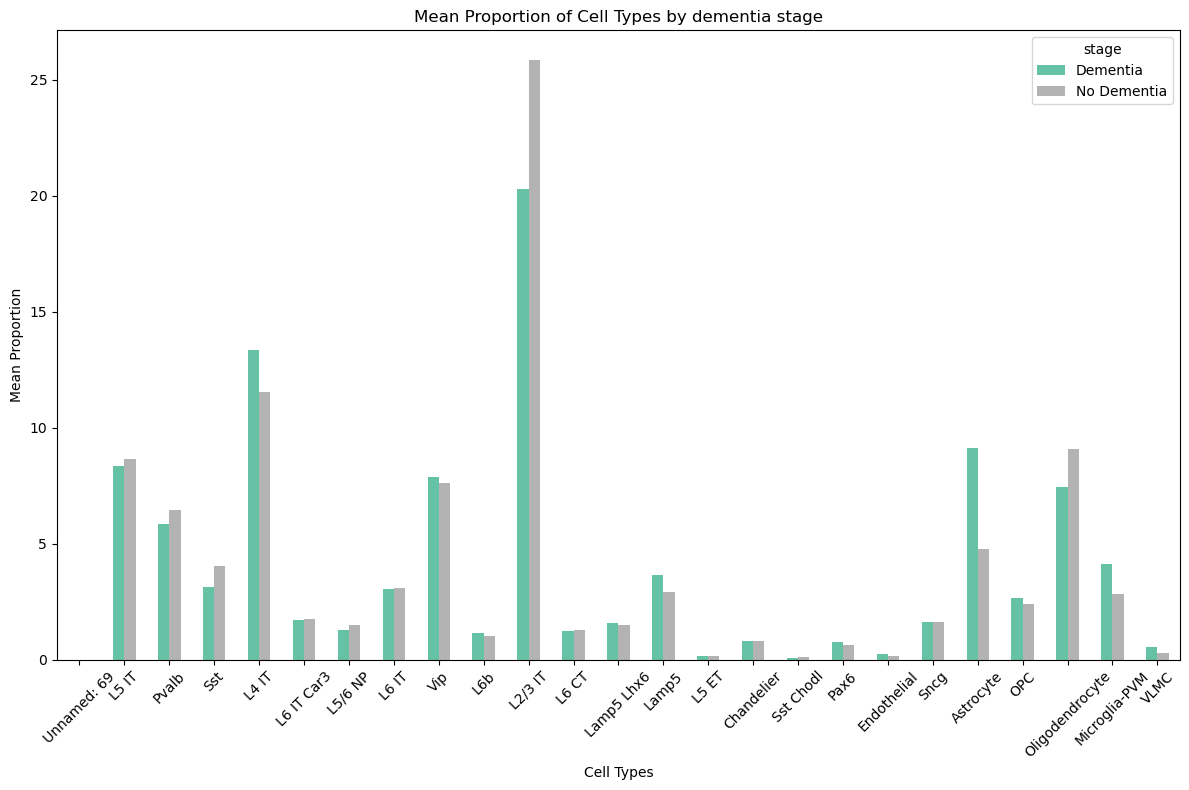

In [20]:

mean_values.T.plot(kind='bar', figsize=(12, 8), cmap='Set2')
plt.xlabel('Cell Types')
plt.ylabel('Mean Proportion')
plt.title('Mean Proportion of Cell Types by dementia stage')
plt.legend(title='stage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [22]:
for cell in cell_columns: 
    group1 = data[data['Group'] == 'Dementia'][cell].dropna()
    group2 = data[data['Group'] == 'No Dementia'][cell].dropna()
    
    if len(group1) > 1 and len(group2) > 1:
        t_stat1, p_value1 = ttest_ind(group1, group2, equal_var=False)
        if p_value1 < 0.05:
            significance = "Significant"
            print({'Cell Type': cell, 't-statistic': t_stat1, 'p-value': p_value1, 'Significance': significance})
        else:
            "no significance"



KeyError: 'Group'